# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn
import math
import torch
import warnings
import scipy.cluster.hierarchy as shc
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import Birch
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA

Importing data sets

In [2]:
Dataset = pd.read_csv('CustomerSeg.csv')
print("Shape dataset =", Dataset.shape)

Shape dataset = (8068, 11)


# **Data preprocessing**

In [3]:
Dataset.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


**General information of Dataset**

In [4]:
print(f"this dataframe has {Dataset.shape[0]} rows and it has {Dataset.shape[1]} coulumns")
print(f"the column names of this dataframe are:\n{Dataset.columns}")
print(f"the column datatypes respectively are:\n{Dataset.dtypes}")
print(f"the number of unique value in each column is as follows:\n{Dataset.nunique()}")
print(f"\n Sample data in the dataframe:\n{Dataset.head()}")
print(f"\n describe of dataframe:\n{Dataset.describe()}")

this dataframe has 8068 rows and it has 11 coulumns
the column names of this dataframe are:
Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')
the column datatypes respectively are:
ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object
the number of unique value in each column is as follows:
ID                 8068
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
Segmentation          4
dtype: int64

 Sample data in the dataframe:
     

In [5]:
#Duplicated & Null
print(f"the number of duplicated value in each column of Dataset is as follows:\n{Dataset.duplicated().sum()}")
print(f"the number of null value in each column of Dataset is as follows:\n{Dataset.isnull().sum()}")
#Checking data balancing
print(f"\n Checking data balancing")
Table1 = pd.DataFrame()
Table1["Count"] = Dataset['Segmentation'].value_counts()
Table1["%"] = round(Dataset['Segmentation'].value_counts()/Dataset.shape[0]*100, 2)
Table1

the number of duplicated value in each column of Dataset is as follows:
0
the number of null value in each column of Dataset is as follows:
ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

 Checking data balancing


,Count,%
D,2268,28.11
A,1972,24.44
C,1970,24.42
B,1858,23.03


**Remove duplicated and ID column**

In [6]:
Dataset.drop("ID", axis=1, inplace=True)
Dataset.drop_duplicates(inplace=True)
Dataset

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


**Handeling Outliers**  

In [7]:
def sigma_rejection(df, column_name, n_sigma):
    mean = df[column_name].mean()
    std = df[column_name].std()
    cutoff = std * n_sigma

    filtered_df = df[(df[column_name] >= mean - cutoff) & (df[column_name] <= mean + cutoff)]

    return filtered_df

In [8]:
Dataset = sigma_rejection(Dataset, 'Family_Size', 6)
Dataset

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


**Fill missing value**

In [9]:
Dataset["Family_Size"].fillna(round(Dataset["Family_Size"].mean() ), inplace=True)
Dataset["Profession"].fillna(Dataset["Profession"].value_counts().idxmax(), inplace=True)
Dataset.dropna(subset=["Var_1"], inplace=True)
Dataset["Work_Experience"].fillna(round(Dataset["Work_Experience"].mean() ), inplace=True)
Dataset.dropna(inplace=True)
print(f"the number of null value in each column of Dataset is as follows:\n{Dataset.isnull().sum()}")

the number of null value in each column of Dataset is as follows:
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


In [10]:
Dataset

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,3.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,3.0,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8063,Male,No,22,No,Artist,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B



**Standardization and create dummy varibles**

In [11]:
Dataset = pd.concat([Dataset, pd.get_dummies(Dataset["Gender"], prefix="Gender")], axis=1)
Dataset = pd.concat([Dataset, pd.get_dummies(Dataset["Ever_Married"], prefix="Ever_Married")], axis=1)
Dataset = pd.concat([Dataset, pd.get_dummies(Dataset["Graduated"], prefix="Graduated")], axis=1)
Dataset = pd.concat([Dataset, pd.get_dummies(Dataset["Profession"], prefix="Profession")], axis=1)
Dataset = pd.concat([Dataset, pd.get_dummies(Dataset["Spending_Score"], prefix="Spending_Score")], axis=1)
Dataset = pd.concat([Dataset, pd.get_dummies(Dataset["Var_1"], prefix="Var")], axis=1)
# [low,average,high] -> [1,2,3]
Dataset["Spending_Score_Level"] = Dataset["Spending_Score"].apply(lambda x: ["Low", "Average", "High"].index(x))+1
#[a,b,c,d] ->  [1,2,3,4]
Dataset["Segmentation_Level"] = Dataset["Segmentation"].apply(lambda x: ["A", "B", "C", "D"].index(x))

scaler = StandardScaler()
Dataset[['Age', 'Family_Size', 'Work_Experience']] = scaler.fit_transform(Dataset[['Age', 'Family_Size', 'Work_Experience']])

print(f"the column names of this dataframe are:\n{Dataset.columns}")


the column names of this dataframe are:
Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'Gender_Female', 'Gender_Male', 'Ever_Married_No',
       'Ever_Married_Yes', 'Graduated_No', 'Graduated_Yes',
       'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer',
       'Profession_Entertainment', 'Profession_Executive',
       'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer',
       'Profession_Marketing', 'Spending_Score_Average', 'Spending_Score_High',
       'Spending_Score_Low', 'Var_Cat_1', 'Var_Cat_2', 'Var_Cat_3',
       'Var_Cat_4', 'Var_Cat_5', 'Var_Cat_6', 'Var_Cat_7',
       'Spending_Score_Level', 'Segmentation_Level'],
      dtype='object')


In [12]:
Dataset.reset_index(inplace=True)
Dataset.drop('index', inplace=True, axis=1)
Dataset

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,...,Spending_Score_Low,Var_Cat_1,Var_Cat_2,Var_Cat_3,Var_Cat_4,Var_Cat_5,Var_Cat_6,Var_Cat_7,Spending_Score_Level,Segmentation_Level
0,Male,No,-1.319382,No,Healthcare,-0.533143,Low,0.744290,Cat_4,D,...,1,0,0,0,1,0,0,0,1,3
1,Female,Yes,-0.344147,Yes,Engineer,0.078005,Average,0.098159,Cat_4,A,...,0,0,0,0,1,0,0,0,2,0
2,Female,Yes,1.423465,Yes,Engineer,-0.533143,Low,-1.194102,Cat_6,B,...,1,0,0,0,0,0,1,0,1,1
3,Male,Yes,1.423465,Yes,Lawyer,-0.838718,High,-0.547971,Cat_6,B,...,0,0,0,0,0,0,1,0,3,1
4,Female,Yes,-0.222243,Yes,Entertainment,0.078005,High,2.036550,Cat_6,A,...,0,0,0,0,0,0,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7058,Male,Yes,-0.161291,Yes,Artist,-0.838718,High,1.390420,Cat_6,B,...,0,0,0,0,0,0,1,0,3,1
7059,Male,No,-1.319382,No,Artist,-0.838718,Low,2.682681,Cat_1,D,...,1,1,0,0,0,0,0,0,1,3
7060,Male,No,-0.527004,No,Executive,0.078005,Low,0.744290,Cat_4,D,...,1,0,0,0,1,0,0,0,1,3
7061,Female,No,-1.014621,Yes,Healthcare,-0.533143,Low,0.744290,Cat_6,B,...,1,0,0,0,0,0,1,0,1,1


#**Illustration**

### Numerical Variables

Age Distribution:


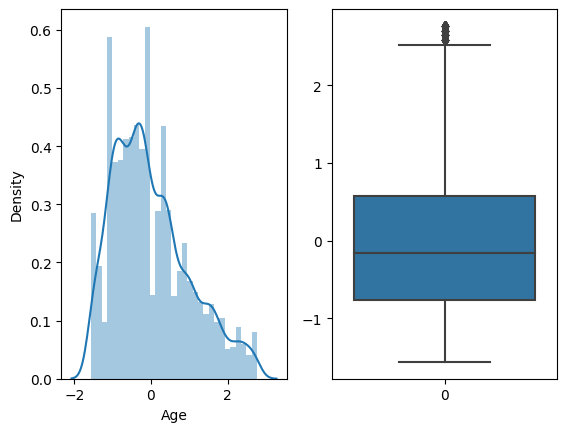


 Work Experience Distribution:


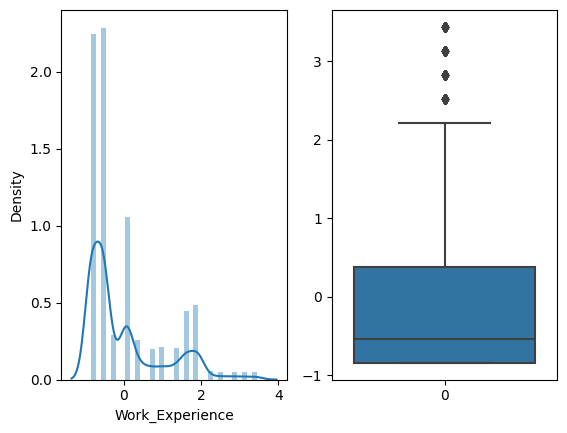


 Family Size Distribution:


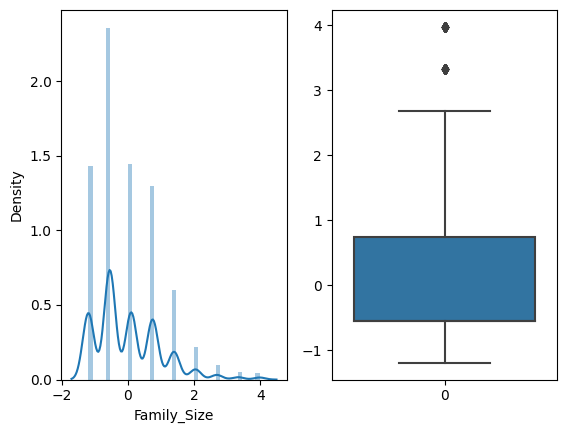

In [13]:
plt.figure()
#Age
print("Age Distribution:")
plt.subplot(1,2,1)
sns.distplot(Dataset['Age'])
plt.subplot(1,2,2)
sns.boxplot(Dataset['Age'])
plt.show()
#Work_Experience
print("\n Work Experience Distribution:")
plt.subplot(1,2,1)
sns.distplot(Dataset['Work_Experience'])
plt.subplot(1,2,2)
sns.boxplot(Dataset['Work_Experience'])
plt.show()
#Family_Size
print("\n Family Size Distribution:")
plt.subplot(1,2,1)
sns.distplot(Dataset['Family_Size'])
plt.subplot(1,2,2)
sns.boxplot(Dataset['Family_Size'])
plt.show()




### Categorical Variables

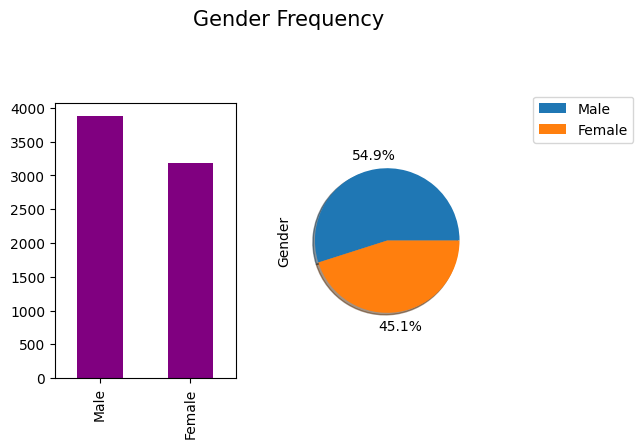

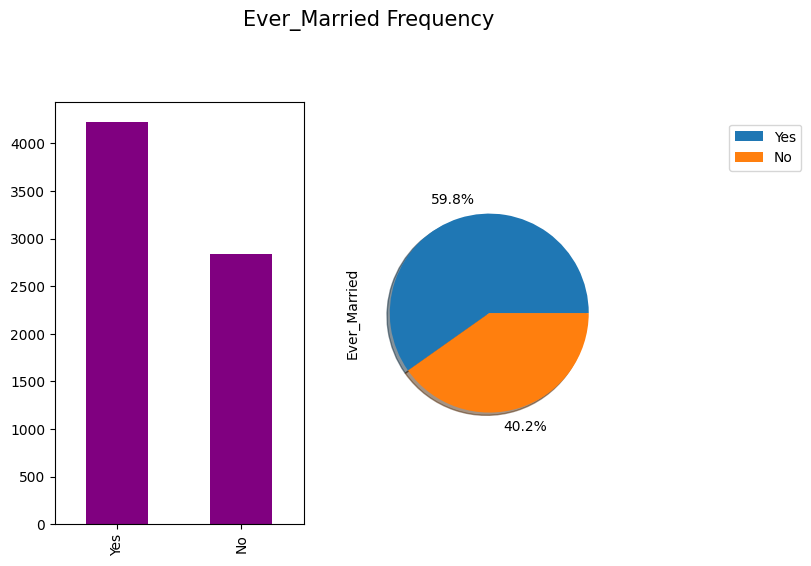

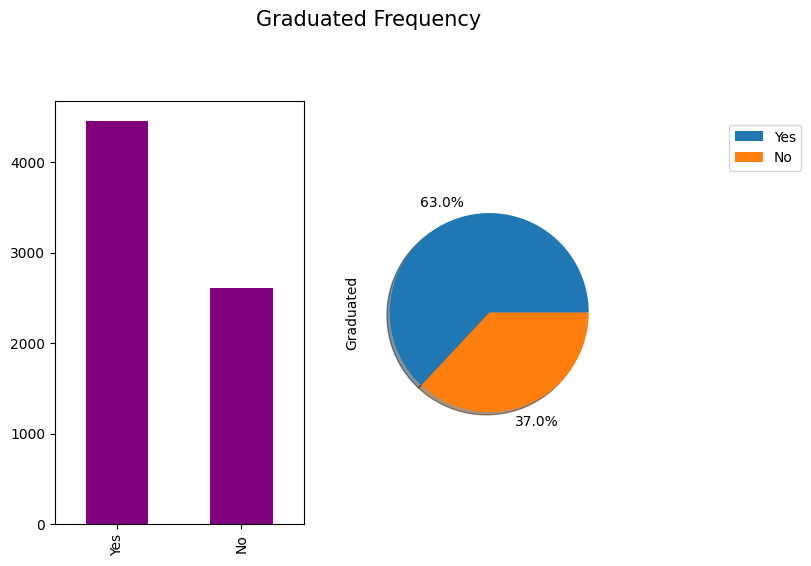

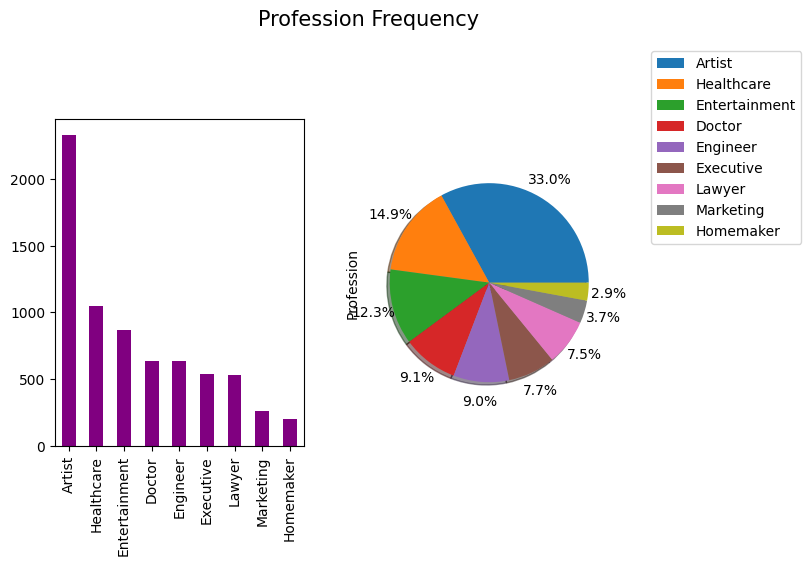

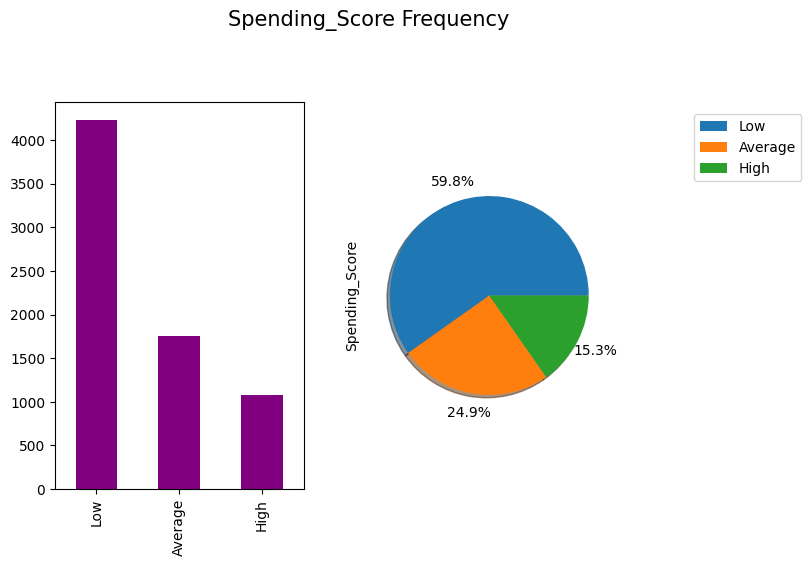

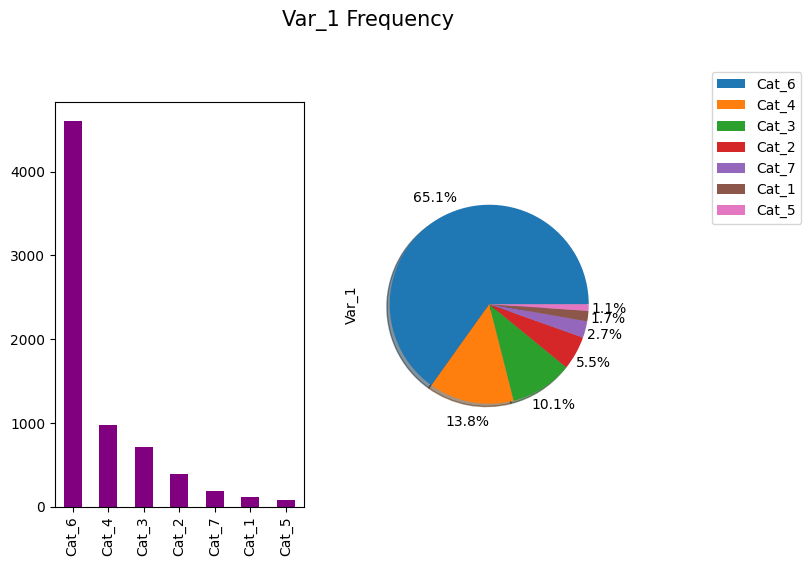

In [14]:
def Categorical_plot(df, f):
  fig, ax = plt.subplots(1, 2)
  df[f"{f}"].value_counts().plot.bar(color="purple", ax=ax[0])
  df[f"{f}"].value_counts().plot.pie(labels=None, autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},pctdistance=1.2, labeldistance=1.5, ax=ax[1])
  plt.legend(labels=df[f"{f}"].value_counts().index.tolist(), bbox_to_anchor=(1.05,0.75), loc="center right", fontsize=10,
           bbox_transform=plt.gcf().transFigure)
  plt.rcParams["figure.figsize"] = [8, 6]
  fig.suptitle(f"{f} Frequency", fontsize=15)
  fig.tight_layout(pad=3.0)
  plt.xticks(rotation=90)
  plt.yticks(rotation=45)
  plt.show()
  print("\n")

Categorical_plot(Dataset,"Gender")
Categorical_plot(Dataset,"Ever_Married")
Categorical_plot(Dataset,"Graduated")
Categorical_plot(Dataset,"Profession")
Categorical_plot(Dataset,"Spending_Score")
Categorical_plot(Dataset,"Var_1")




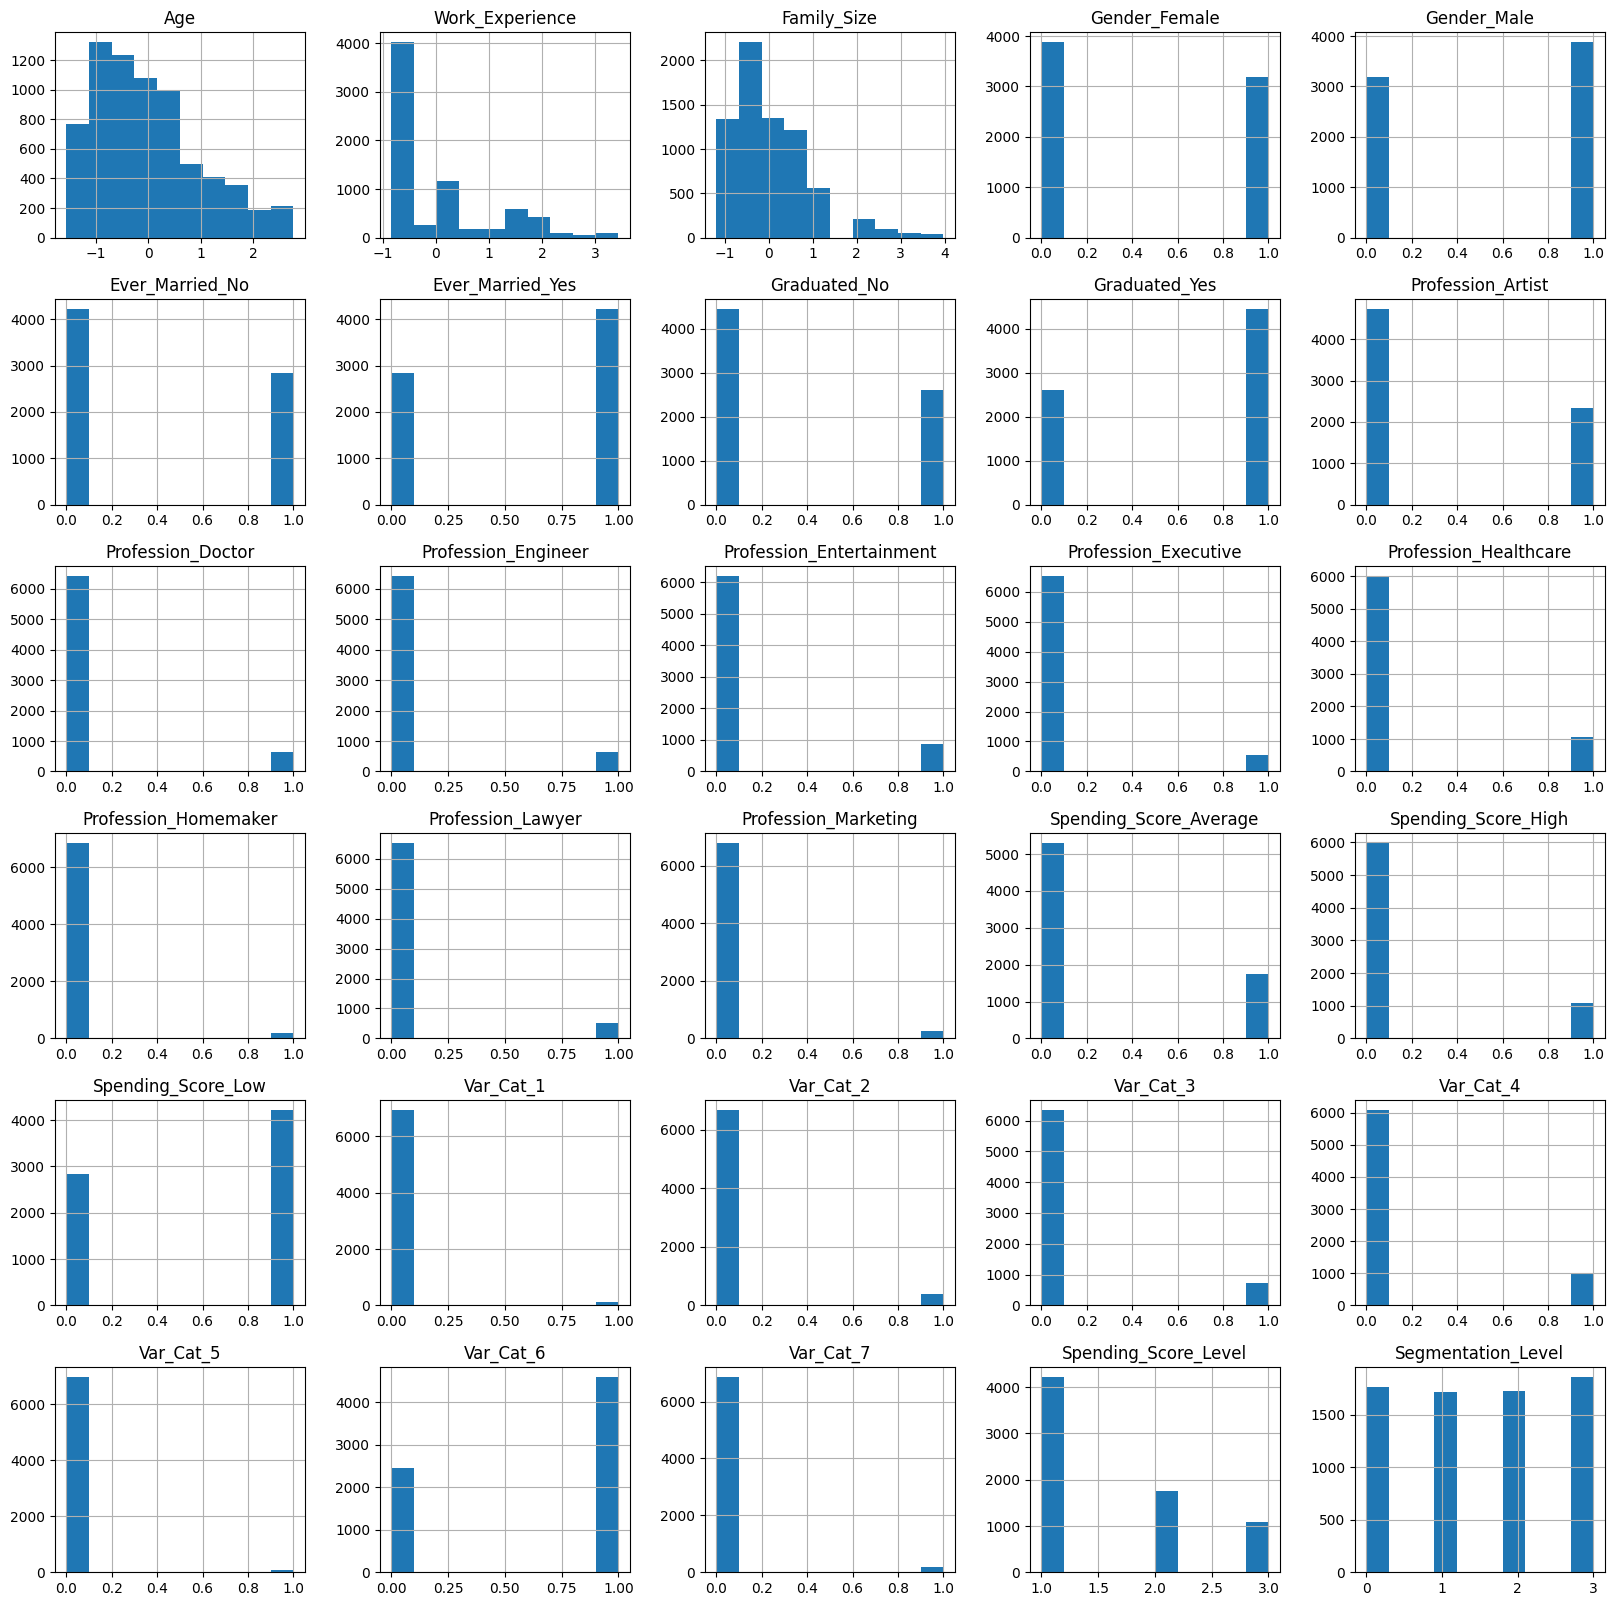

In [15]:
Dataset.hist(figsize=(20,20))
plt.show()

In [16]:
Dataset.drop('Gender', inplace=True, axis=1)
Dataset.drop('Ever_Married', inplace=True, axis=1)
Dataset.drop('Graduated', inplace=True, axis=1)
Dataset.drop('Profession', inplace=True, axis=1)
Dataset.drop('Spending_Score', inplace=True, axis=1)
Dataset.drop('Var_1', inplace=True, axis=1)
Dataset.drop('Segmentation', inplace=True, axis=1)
Dataset.drop('Gender_Female', inplace=True, axis=1)
Dataset.drop('Ever_Married_No', inplace=True, axis=1)
Dataset.drop('Graduated_No', inplace=True, axis=1)
Dataset.drop('Spending_Score_Level', inplace=True, axis=1)
Dataset

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Spending_Score_High,Spending_Score_Low,Var_Cat_1,Var_Cat_2,Var_Cat_3,Var_Cat_4,Var_Cat_5,Var_Cat_6,Var_Cat_7,Segmentation_Level
0,-1.319382,-0.533143,0.744290,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,3
1,-0.344147,0.078005,0.098159,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1.423465,-0.533143,-1.194102,0,1,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
3,1.423465,-0.838718,-0.547971,1,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,-0.222243,0.078005,2.036550,0,1,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7058,-0.161291,-0.838718,1.390420,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
7059,-1.319382,-0.838718,2.682681,1,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,3
7060,-0.527004,0.078005,0.744290,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,3
7061,-1.014621,-0.533143,0.744290,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


**Dimensionality Reduction and remove labels**

In [17]:
DF = Dataset[['Profession_Artist', 'Profession_Doctor', 'Profession_Engineer','Profession_Entertainment', 'Profession_Executive',
           'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer',"Age", "Family_Size", "Work_Experience", "Graduated_Yes",
           "Spending_Score_Low", "Spending_Score_Average", "Ever_Married_Yes"]]
DF

,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Age,Family_Size,Work_Experience,Graduated_Yes,Spending_Score_Low,Spending_Score_Average,Ever_Married_Yes
0,0,0,0,0,0,1,0,0,-1.319382,0.744290,-0.533143,0,1,0,0
1,0,0,1,0,0,0,0,0,-0.344147,0.098159,0.078005,1,0,1,1
2,0,0,1,0,0,0,0,0,1.423465,-1.194102,-0.533143,1,1,0,1
3,0,0,0,0,0,0,0,1,1.423465,-0.547971,-0.838718,1,0,0,1
4,0,0,0,1,0,0,0,0,-0.222243,2.036550,0.078005,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7058,1,0,0,0,0,0,0,0,-0.161291,1.390420,-0.838718,1,0,0,1
7059,1,0,0,0,0,0,0,0,-1.319382,2.682681,-0.838718,0,1,0,0
7060,0,0,0,0,1,0,0,0,-0.527004,0.744290,0.078005,0,1,0,0
7061,0,0,0,0,0,1,0,0,-1.014621,0.744290,-0.533143,1,1,0,0


# **Clustering**

**k_means**

1.4344721158199105


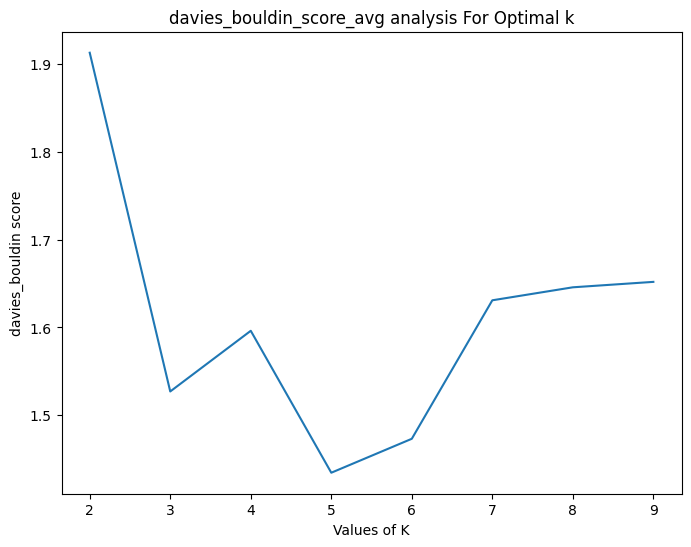

In [23]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
davies_bouldin_score_avg = []
for num_clusters in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(DF)
  cluster_labels = kmeans.labels_
  # pairwise_distances score
  davies_bouldin_score_avg.append(davies_bouldin_score(DF, cluster_labels))
print(min(davies_bouldin_score_avg))
plt.plot(range_n_clusters,davies_bouldin_score_avg)
plt.xlabel('Values of K')
plt.ylabel('davies_bouldin score')
plt.title('davies_bouldin_score_avg analysis For Optimal k')
plt.show()

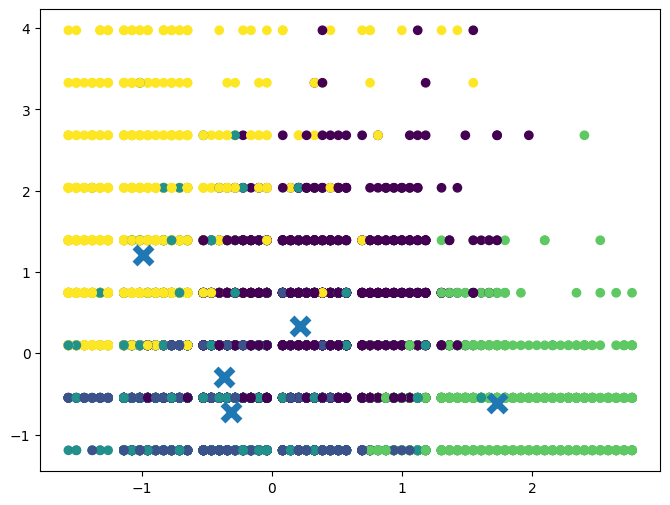

In [24]:
# so the best value of k is 4 or 5
kmeans = KMeans(n_clusters=5)
kmeans.fit(DF)
# kmeans.labels_
y_train = pd.DataFrame(kmeans.labels_)
center = kmeans.cluster_centers_
# Age 8, Family_Size 9
plt.scatter(x=DF.iloc[:, 8], y=DF.iloc[:, 9], c=y_train)
plt.scatter(center[:,8], center[:,9], marker='x', s=150, linewidths=5)
plt.show()

**Birch**

1.5432182522874711


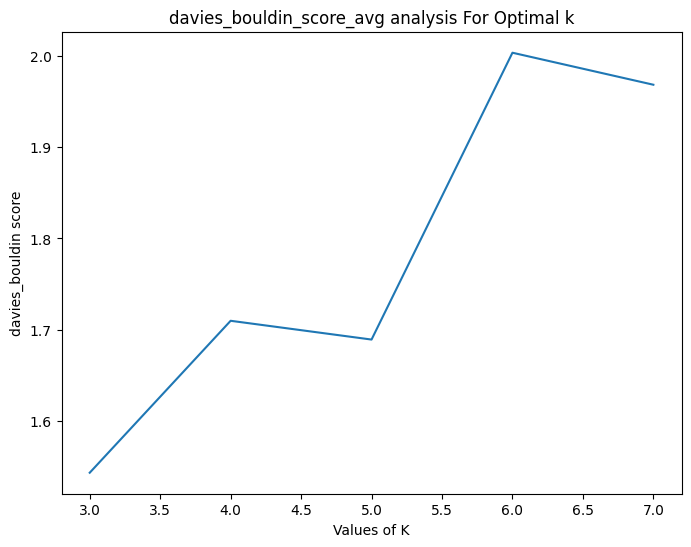

In [18]:
range_n_clusters = [3, 4, 5, 6, 7]
davies_bouldin_score_avg = []
for num_clusters in range_n_clusters:
  # initialise kmeans
  BRICH = Birch(branching_factor = 60, n_clusters = num_clusters , threshold = 1.0)
  BRICH.fit(DF)
  cluster_labels = BRICH.labels_
  # pairwise_distances score
  davies_bouldin_score_avg.append(davies_bouldin_score(DF, cluster_labels))

print(min(davies_bouldin_score_avg))
plt.plot(range_n_clusters,davies_bouldin_score_avg)
plt.xlabel('Values of K')
plt.ylabel('davies_bouldin score')
plt.title('davies_bouldin_score_avg analysis For Optimal k')
plt.show()

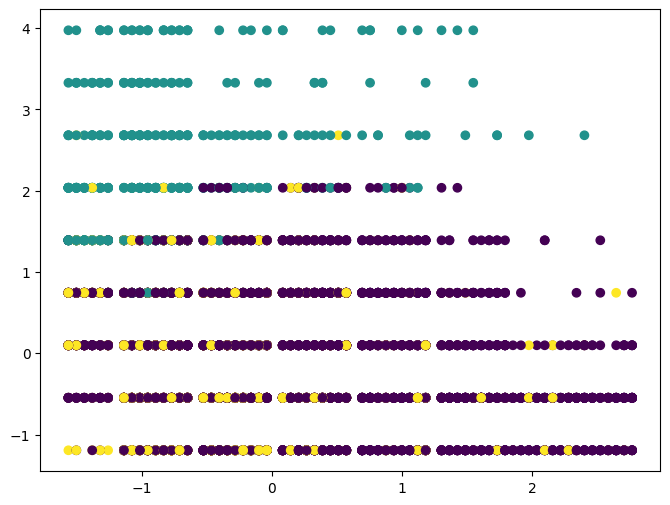

In [19]:
# so the best value of k is 4 or 5
BRICH = Birch(branching_factor = 60, n_clusters = 3 , threshold = 1.0)
BRICH.fit(DF)
y_train = pd.DataFrame(BRICH.labels_)
plt.scatter(x=DF.iloc[:, 8], y=DF.iloc[:, 9], c=y_train)
plt.show()

**Spectral Clustering**

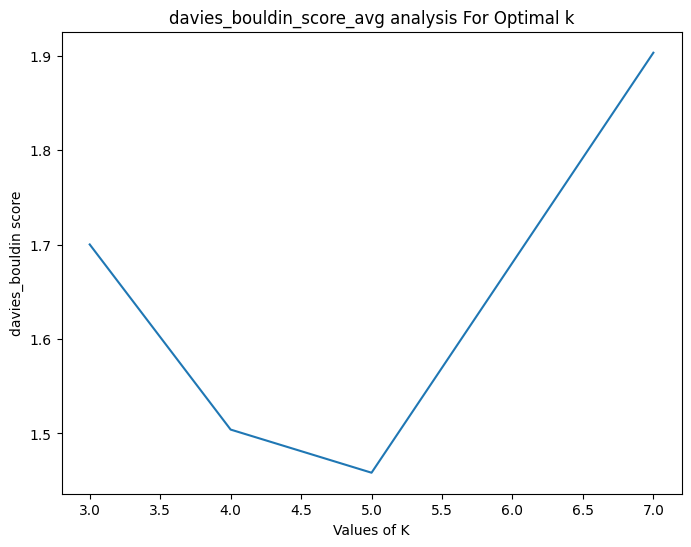

In [20]:
range_n_clusters = [3, 4, 5, 7]
davies_bouldin_score_avg = []
for num_clusters in range_n_clusters:
  sc = SpectralClustering(n_clusters=num_clusters)
  sc.fit(DF)
  cluster_labels = sc.labels_
  davies_bouldin_score_avg.append(davies_bouldin_score(DF, cluster_labels))
plt.plot(range_n_clusters, davies_bouldin_score_avg)
plt.xlabel('Values of K')
plt.ylabel('davies_bouldin score')
plt.title('davies_bouldin_score_avg analysis For Optimal k')
plt.show()

1.4583454449244388


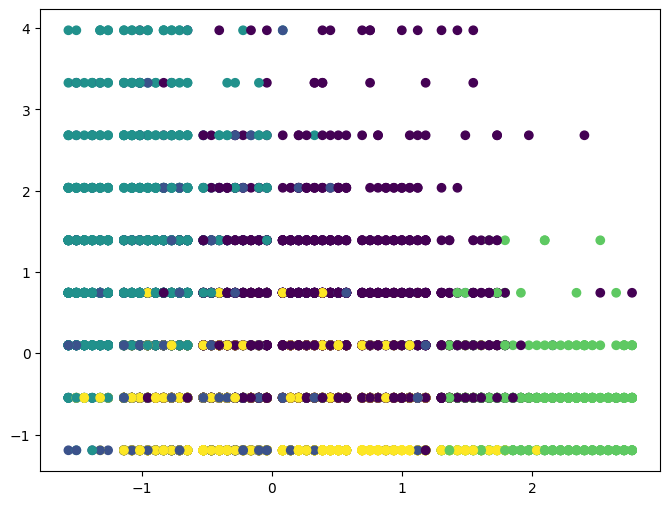

In [31]:
sc = SpectralClustering(n_clusters=5)
sc.fit(DF)
print(min(davies_bouldin_score_avg))
y_train = pd.DataFrame(sc.labels_)
plt.scatter(x=DF.iloc[:, 8], y=DF.iloc[:, 9], c=y_train)
plt.show()

**mean shift**

1.6713284508623805


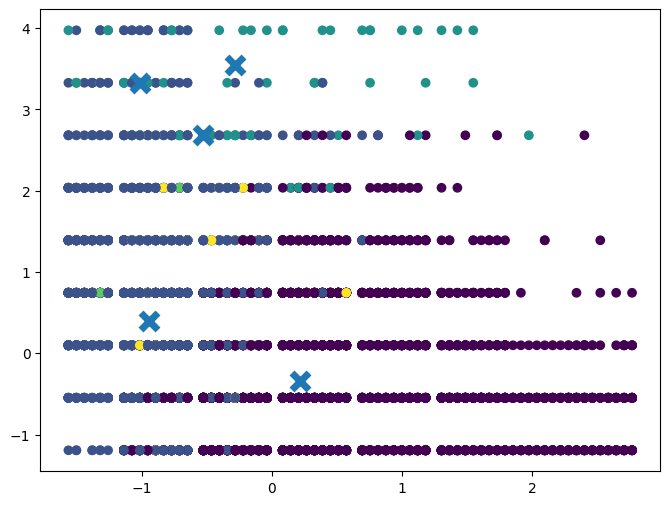

In [22]:
meanshift = MeanShift(bandwidth=1.7)
meanshift.fit(DF)
y_train = pd.DataFrame(meanshift.labels_)
center = meanshift.cluster_centers_
print(davies_bouldin_score(DF, meanshift.labels_))
plt.scatter(x=DF.iloc[:, 8], y=DF.iloc[:, 9], c=y_train)
plt.scatter(center[:,8], center[:,9], marker='x', s=150, linewidths=5)
plt.show()


**Hierarchical clustering**

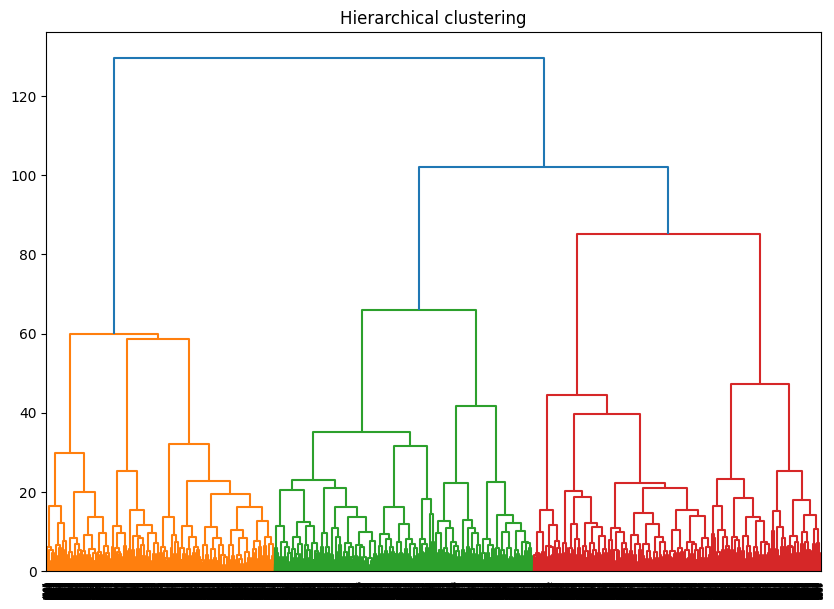

In [42]:
plt.figure(figsize=(10, 7))
plt.title("Hierarchical clustering")

clusters = shc.linkage(DF,
            method='ward',
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

1.8876599466641781


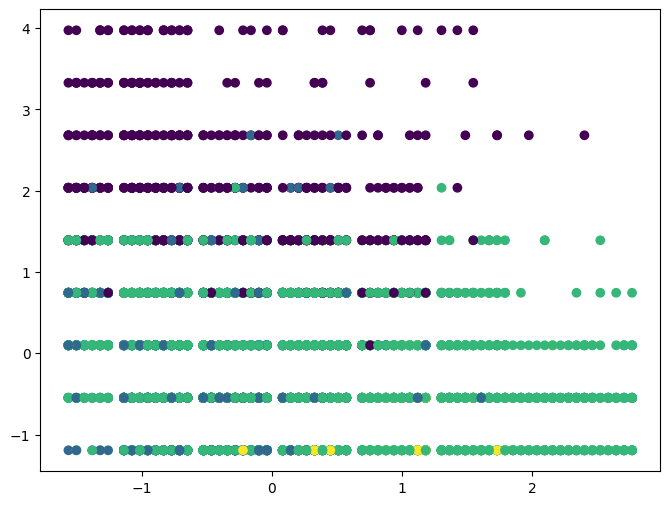

In [33]:
clustering_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
clustering_model.fit(DF)
y_train = pd.DataFrame(clustering_model.labels_)
print(davies_bouldin_score(DF, clustering_model.labels_))
plt.scatter(x=DF.iloc[:, 8], y=DF.iloc[:, 9], c=y_train)
plt.show()


**Self-Organizing Map (SOM) clustering with PyTorch**

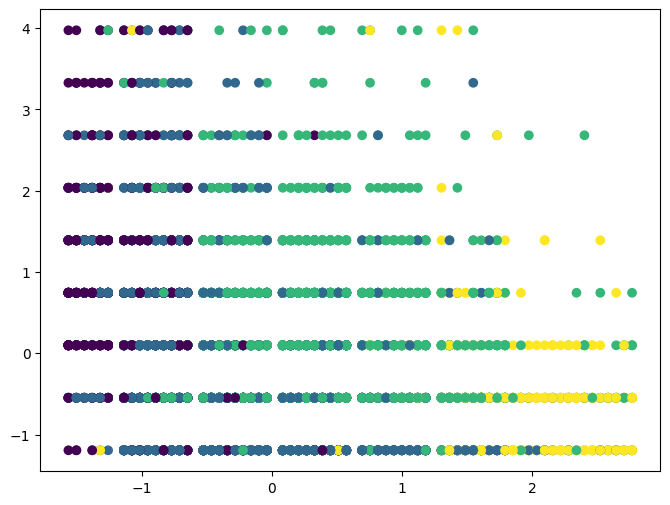

In [34]:
data_norm = (DF - DF.mean()) / DF.std()

# Convert the dataframe to a PyTorch tensor
data_tensor = torch.tensor(data_norm.values)
# Perform k-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_norm)
# Get the cluster assignments for each datapoint
labels = kmeans.labels_
# Create a SOM with the same number of nodes as clusters
nodes = kmeans.cluster_centers_
som = torch.tensor(nodes)
# Compute the best matching unit (BMU) for each datapoint
bmu_indices = []
for datapoint in data_tensor:
    distances = torch.norm(datapoint-som, dim=1)
    bmu_index = torch.argmin(distances)
    bmu_indices.append(bmu_index)
# Convert the list of BMU indices to a PyTorch tensor
bmu_indices = torch.tensor(bmu_indices)
# Visualize the results
plt.scatter(x=DF.iloc[:, 8], y=DF.iloc[:, 9], c=labels)
plt.show()